In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [292]:
# Read in the data 
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [293]:
df.shape

(7668, 15)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [295]:
# Checking for missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [296]:
# Checking if there are other nan values other than the missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [297]:
df_copy = df.copy()
df_copy.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Dropping the missing values in the non numeric columns

1. rating
2. released
3. writer
4. star
5. country
6. company

In [299]:
df_copy.dropna(subset = ["released"], inplace = True)
df_copy.dropna(subset = ["rating"], inplace = True)
df_copy.dropna(subset = ["writer"], inplace = True)
df_copy.dropna(subset = ["star"], inplace = True)
df_copy.dropna(subset = ["country"], inplace = True)
df_copy.dropna(subset = ["company"], inplace = True)
df_copy["rating"].isna().sum()

0

In [300]:
df_copy.isna().sum()

name           0
rating         0
genre          0
year           0
released       0
score          1
votes          1
director       0
writer         0
star           0
country        0
budget      2101
gross        163
company        0
runtime        1
dtype: int64

### Replacing the missing values for the numeric columns with each of their means

1. score
2. votes
3. budget
4. gross
5. runtime

In [302]:
df_copy["score"] = df_copy["score"].fillna(df_copy["score"].mean())
df_copy["votes"] = df_copy["votes"].fillna(df_copy["votes"].mean())
df_copy["budget"] = df_copy["budget"].fillna(df_copy["budget"].mean())
df_copy["gross"] = df_copy["gross"].fillna(df_copy["gross"].mean())
df_copy["runtime"] = df_copy["runtime"].fillna(df_copy["runtime"].mean())


In [303]:
df_copy.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [304]:
df_copy

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2.400000e+03,Scott Teems,Scott Teems,Shea Whigham,United States,3.571095e+07,3.661000e+03,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,2.940000e+02,Scott Pryor,Scott Pryor,Scott Pryor,United States,3.571095e+07,4.133780e+05,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,3.500000e+01,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5.000000e+03,7.898803e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,4.470000e+02,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,3.571095e+07,1.326600e+04,Roxwell Films,87.0


### Changing data types for some columns


In [306]:
df_copy["votes"] = df_copy["votes"].astype("int64")
df_copy["budget"] = df_copy["budget"].astype("int64")
df_copy["gross"] = df_copy["gross"].astype("int64")

In [307]:
df_copy.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

### Updating the year column

In [309]:
df_copy['year_correct'] = df_copy['released'].astype(str).str.split().str[2]
df_copy['year_correct']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7653    2020
7656    2020
7658    2020
7659    2020
7661    2020
Name: year_correct, Length: 7576, dtype: object

In [310]:
df_copy = df_copy.drop(["year"], axis = 1)

In [311]:
df_copy.dropna(subset = ["year_correct"], inplace = True)

In [312]:
df_copy["year_correct"].isna().sum()

0

In [313]:
df_copy.sort_values(by = ["gross"], ascending = False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35710948,1672,Polygram Filmed Entertainment,87.0,1998
2906,Pusher,Not Rated,Crime,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35710948,1605,Balboa Entertainment,110.0,1996
3818,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35710948,1400,British Broadcasting Corporation (BBC),103.0,2001
7580,Run with the Hunted,Not Rated,Crime,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35710948,682,Roxwell Films,93.0,2020


## Analysing the correleation

In [315]:
sns.set_palette('colorblind')

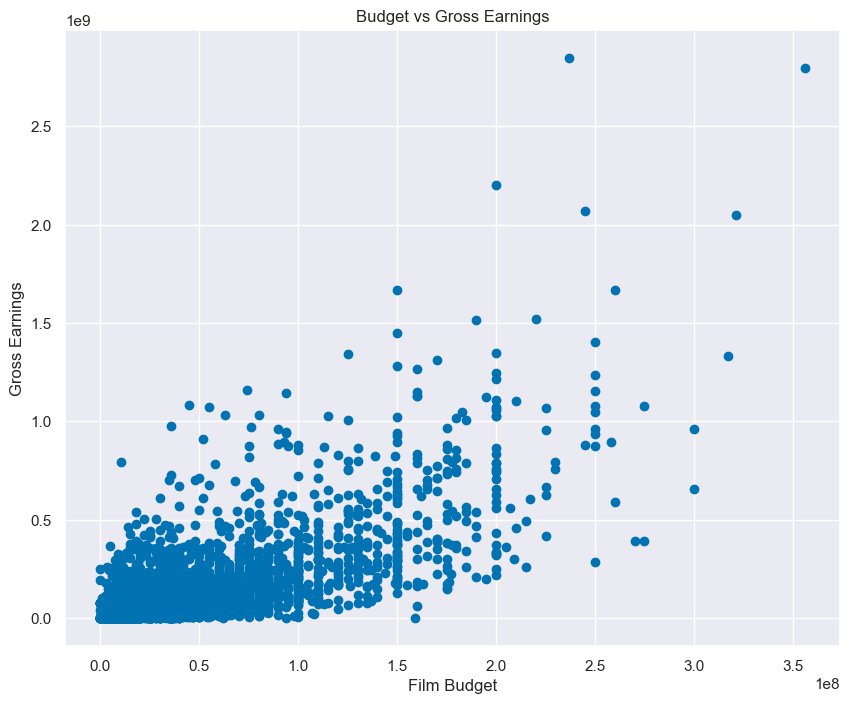

In [316]:
# Budget vs Gross 

plt.figure(figsize = (10, 8))
plt.scatter(x = df_copy["budget"], 
            y = df_copy["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Film Budget")
plt.ylabel("Gross Earnings")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

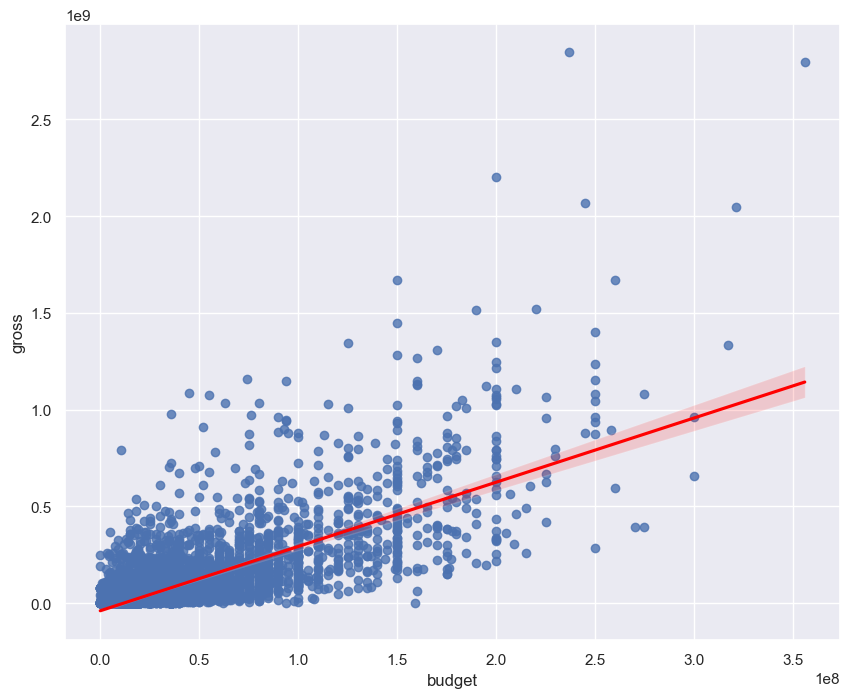

In [317]:
# Budget vs Gross regression plot
plt.figure(figsize = (10, 8))
sns.regplot(df_copy, 
            x = "budget", 
            y = "gross", 
            scatter_kws = {'color': 'b'}, 
            line_kws = {'color': 'red'})

### Looking at correlation

In [319]:
df_copy.corr(numeric_only = True)

,score,votes,budget,gross,runtime
score,1.000000,0.412378,0.064849,0.185290,0.400890
votes,0.412378,1.000000,0.420798,0.629269,0.309359
budget,0.064849,0.420798,1.000000,0.712178,0.265732
gross,0.185290,0.629269,0.712178,1.000000,0.241603
runtime,0.400890,0.309359,0.265732,0.241603,1.000000


### High correlation between budget and gross

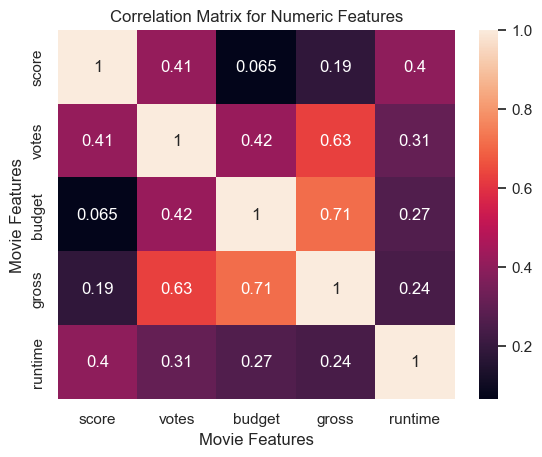

In [321]:
correlation_matrix = df_copy.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

## Plotting the Avergae Gross Earnings by Each Genre

In [323]:
df_copy["genre"].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'Mystery', 'Sport', 'Musical'],
      dtype=object)

In [324]:
genre_means = df_copy.groupby('genre')['gross'].mean().reset_index()
print(genre_means)

        genre         gross
0      Action  1.446284e+08
1   Adventure  1.090564e+08
2   Animation  2.398983e+08
3   Biography  4.901072e+07
4      Comedy  4.526852e+07
5       Crime  4.034306e+07
6       Drama  4.025011e+07
7      Family  2.157876e+08
8     Fantasy  4.017568e+07
9      Horror  4.920820e+07
10      Music  1.100140e+05
11    Musical  2.217255e+06
12    Mystery  1.011835e+08
13    Romance  2.354937e+07
14     Sci-Fi  3.771977e+07
15      Sport  1.067629e+06
16   Thriller  3.994845e+07
17    Western  1.067530e+07


### Animation, Family and Action have grossed the most earnings compared to the other genres

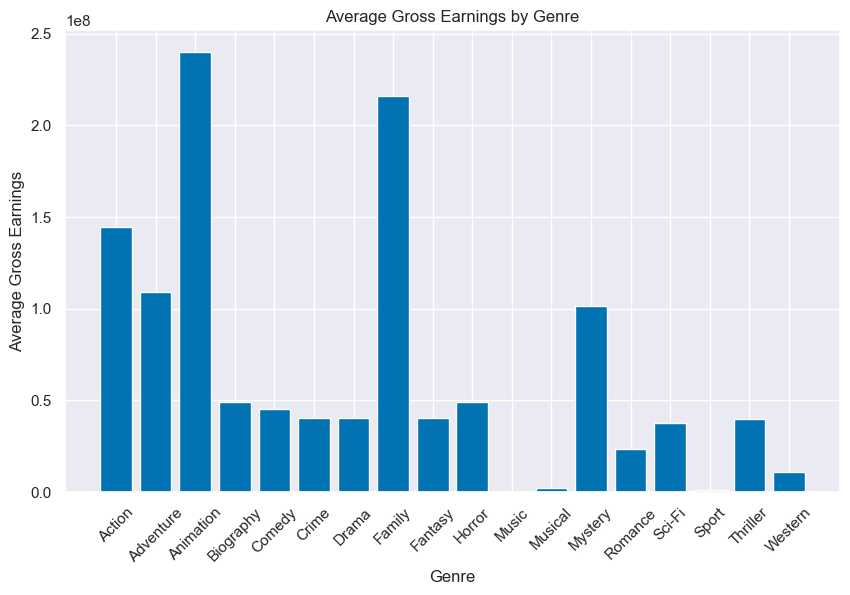

In [326]:
plt.figure(figsize=(10, 6))
plt.bar(genre_means['genre'], genre_means['gross'])
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings by Genre')
plt.show()

In [327]:
df_copy

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,"April 17, 2020 (Mexico)",5.400000,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35710948,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,"June 3, 2020 (United States)",5.000000,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35710948,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,"February 7, 2020 (United States)",6.600000,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78988033,Notis Studio,78.0,2020
7659,I Am Fear,Not Rated,Horror,"March 3, 2020 (United States)",3.400000,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35710948,13266,Roxwell Films,87.0,2020
